# Baby Names

## This notebook will be used to explore the baby names dataset for web presentation

This idea was inspired by an example in the O'Reilly book, Python for Data Analysis written by Wes McKiney which was inspired by Hadley Wickham's example he used in R.

These baby names are provided from the United States Social Security Administration (SSA) as of 2016.

For more updated files, please visit: https://www.ssa.gov/oact/babynames/

## Set up Environment

In [1]:
%matplotlib inline

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Set datapath and chdir

In [2]:
raw_files_dest = r'C:\Dev\DataSets\names'
os.chdir(raw_files_dest)
os.listdir(raw_files_dest)[:10]

['NationalReadMe.pdf',
 'temp-plot.html',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt']

## Explore one year of data

In [3]:
dob_file_path = os.path.join(raw_files_dest, 'yob1900.txt')

dob_file_raw = pd.read_csv(dob_file_path, names= ['name', 'sex', 'births'])
dob_file_raw.head()

,name,sex,births
0,Mary,F,16707
1,Helen,F,6343
2,Anna,F,6114
3,Margaret,F,5304
4,Ruth,F,4765


## Put all datafiles (years) together

In [4]:
years = range(1880, 2016)
columns = ['name', 'sex', 'births']
data_pieces = []

for year in years:
    dob_file_path = os.path.join(raw_files_dest, 'yob{}.txt'.format(year))
    dob_file_raw = pd.read_csv(dob_file_path, names=columns)
    
    dob_file_raw['year'] = year
    
    data_pieces.append(dob_file_raw)
    
all_names = pd.concat(data_pieces, ignore_index=True)
all_names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


## Explore total births by Year

In [5]:
total_births = pd.pivot_table(all_names, values= 'births', index= 'year', columns='sex', aggfunc= sum)
total_births.tail()

sex,F,M
year,,
2011,1754424,1894262
2012,1755254,1890889
2013,1747544,1883945
2014,1777242,1910876
2015,1769325,1898858


## Explore total births by Name

In [6]:
total_births = pd.pivot_table(all_names, 
                              values= 'births', 
                              index= 'name', 
                              aggfunc= sum)
total_births.head()

name
Aaban        87
Aabha        28
Aabid         5
Aabriella    15
Aada          5
Name: births, dtype: int64

## Add column for proportion of names

In [7]:
def add_prop(group):
    #Integer division floors
    births = group.births.astype(float)
    
    group['prop'] = births / births.sum()
    
    return group

all_names = all_names.groupby(['year', 'sex']).apply(add_prop)
all_names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189


## Ensure proportion column nearly equals 1

In [8]:
np.allclose(all_names.groupby(['year', 'sex']).prop.sum(), 1)

True

## Take grouped subset of data - top 1000 names per year

In [9]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = all_names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077644
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021310
         4     Minnie   F    1746  1880  0.019189

## Split Boys and Girls for Analysis

In [10]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

## Pivot top 1000 names by year to year by names

In [11]:
total_births = pd.pivot_table(top1000, values='births', index= 'year', columns='name')
total_births.head()

name,Aaden,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


## Plot comparrison of 4 names over time

Slight decrease of count implies that these names have lost popularity over time, however, something else may be happening...

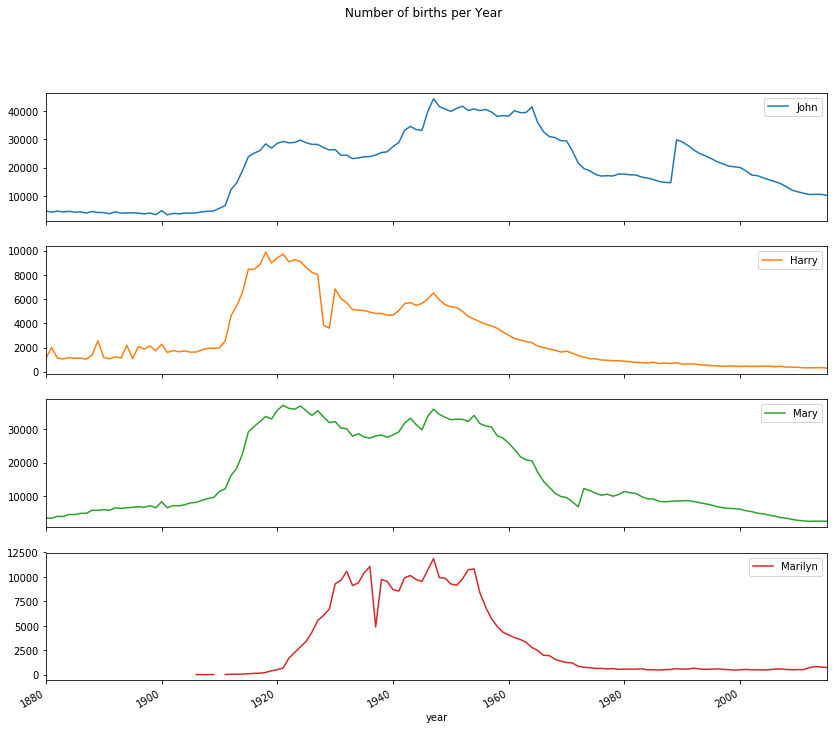

In [12]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

subset.plot(
    subplots=True, 
    figsize=(14, 12), 
    grid=False, 
    title= 'Number of births per Year'
)

plt.show()

## Measure name diversity over time

The plot's decreasing trend shows that the top 1000 names have made a decrease in proportion to all names born in the respective year beginning around the 70s.  Does this plot suggest that Female names are more diverse than Male names in the current environment?

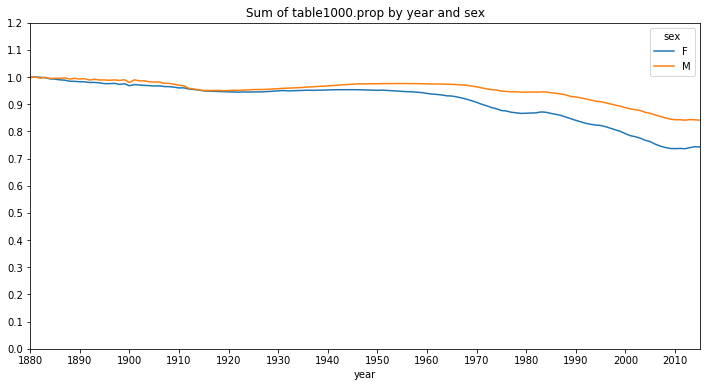

In [13]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

table.plot(
    figsize=(12,6),
    xticks=range(1880, 2020, 10),
    yticks=np.linspace(0, 1.2, 13), 
    title='Sum of table1000.prop by year and sex')

plt.show()

In [14]:
all_names = top1000.name.unique()
all_names

array(['Mary', 'Anna', 'Emma', ..., 'Yahya', 'Kye', 'Brixton'], dtype=object)

In [15]:
mask = np.array(['lesl' in x.lower() for x in all_names])

lesley_like = all_names[mask]

lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [16]:
filtered = top1000[top1000.name.isin(lesley_like)]

filtered.groupby('name').births.sum()

filtered

name sex  births  year      prop
year sex                                            
1880 F   654      Leslie   F       8  1880  0.000088
     M   1108     Leslie   M      79  1880  0.000715
1881 F   2522     Leslie   F      11  1881  0.000120
     M   3072     Leslie   M      92  1881  0.000913
1882 F   4593     Leslie   F       9  1882  0.000083
     M   5081     Leslie   M     122  1882  0.001073
         5865     Lesley   M       6  1882  0.000053
1883 F   6850     Leslie   F       7  1883  0.000062
     M   7225     Leslie   M     120  1883  0.001147
         8093     Lesley   M       5  1883  0.000048
1884 F   8697     Leslie   F      15  1884  0.000116
     M   9432     Leslie   M     125  1884  0.001092
1885 F   11161    Leslie   F      10  1885  0.000075
     M   11751    Leslie   M     122  1885  0.001132
1886 F   13601    Leslie   F       8  1886  0.000055
     M   14132    Leslie   M     136  1886  0.001228
1887 F   15806    Leslie   F      12  1887  0.000082
     M   16524    Leslie   M     166  1887  0.001637
1888 F   18030    Leslie   F      23  1888  0.000129
     M   19074    Leslie   M     175  1888  0.001448
1889 F   20690    Leslie   F      23  1889  0.000129
     M   21737    Leslie   M     155  1889  0.001402
1890 F   23332    Leslie   F      20  1890  0.000105
     M   24372    Leslie   M     181  1890  0.001630
1891 F   25928    Leslie   F      28  1891  0.000151
     M   27068    Leslie   M     164  1891  0.001621
1892 F   28704    Leslie   F      22  1892  0.000104
     M   29851    Leslie   M     207  1892  0.001696
1893 F   31576    Leslie   F      26  1893  0.000122
     M   32765    Leslie   M     185  1893  0.001647
...                  ...  ..     ...   ...       ...
2003 F   1423283  Leslie   F    3637  2003  0.001992
         1423556   Lesly   F     838  2003  0.000459
         1423795  Lesley   F     451  2003  0.000247
2004 F   1454464  Leslie   F    3499  2004  0.001907
         1454778   Lesly   F     747  2004  0.000407
         1454981  Lesley   F     451  2004  0.000246
2005 F   1486514  Leslie   F    3122  2005  0.001692
         1486812   Lesly   F     783  2005  0.000424
         1487127  Lesley   F     382  2005  0.000207
2006 F   1519058  Leslie   F    3036  2006  0.001599
         1519369   Lesly   F     761  2006  0.000401
         1519697  Lesley   F     370  2006  0.000195
2007 F   1553150  Leslie   F    2690  2007  0.001401
         1553452   Lesly   F     766  2007  0.000399
         1553839  Lesley   F     352  2007  0.000183
2008 F   1588111  Leslie   F    2325  2008  0.001232
         1588415   Lesly   F     699  2008  0.000370
2009 F   1623175  Leslie   F    1979  2009  0.001079
         1623519   Lesly   F     598  2009  0.000326
2010 F   1657903  Leslie   F    1564  2010  0.000882
         1658284   Lesly   F     505  2010  0.000285
2011 F   1691999  Leslie   F    1285  2011  0.000732
         1692446   Lesly   F     404  2011  0.000230
2012 F   1725900  Leslie   F    1219  2012  0.000694
         1726391   Lesly   F     367  2012  0.000209
2013 F   1759615  Leslie   F    1111  2013  0.000636
         1760168   Lesly   F     313  2013  0.000179
2014 F   1792897  Leslie   F    1000  2014  0.000563
         1793525   Lesly   F     276  2014  0.000155
2015 F   1826107  Leslie   F     876  2015  0.000495

[408 rows x 5 columns]

In [17]:
table = filtered.pivot_table('births', 
                             index='year', 
                             columns='sex', 
                             aggfunc='sum')
table.head()

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0


In [18]:
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2011,1.0,NaN
2012,1.0,NaN
2013,1.0,NaN
2014,1.0,NaN
2015,1.0,NaN


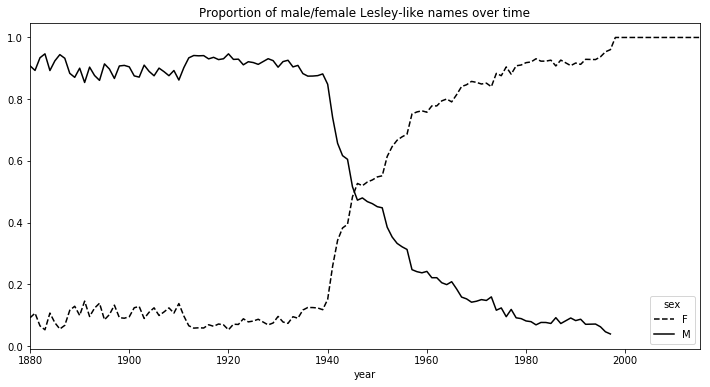

In [19]:
table.plot(figsize=(12, 6),
           style={'M': 'k-', 'F': 'k--'}, 
           title = 'Proportion of male/female Lesley-like names over time')

plt.show()